<a href="https://colab.research.google.com/github/mbilalhameed/demo-public-repo/blob/master/car_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction Data:



**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import missingno
sns.set(color_codes=True)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_sales.xlsx to car_sales.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded['car_sales.xlsx'])) 
df.head()


,manufact,model,type,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,price
0,Acura,Integra,0,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,21.50
1,Acura,CL,0,3.2,225,106.9,70.6,192.0,3.470,17.2,26.0,NaN
2,Acura,TL,0,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,28.40
3,Acura,RL,0,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,42.00
4,Audi,A4,0,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,23.99


**Number of Entries**

In [ ]:
print("Number of entries",len(df))

Number of entries 153


##**Data Description**
#### **Columns:**

* **manufact** : Manufacturer Name
* **model**    : Model of car
* **price**    : Price of car
* **type**     : 1=SUV , 0=Non-SUV
* **engine_s** : total volume of air and fuel that's pushed through the engine by its cylinders
* **horsepow** : Engine power
* **wheelbas** : distance between front and rear wheels
* **width**    : Width of car
* **length**   : Length of car
* **curb_wgt** : Weight of a car without occupants or baggage.
* **fuel_cap** : Fuel capacity
* **mpg**      : Miles per gallon

In [ ]:
df.describe()

,type,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,price
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,152.000000
mean,0.261438,3.050327,185.071895,107.410458,71.085621,187.091503,3.376797,17.954248,23.855556,27.331822
std,0.440861,1.046430,56.729054,7.692522,3.453477,13.432800,0.634540,3.925088,4.294165,14.418669
min,0.000000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,9.235000
25%,0.000000,2.300000,148.000000,103.000000,68.400000,177.500000,2.967000,15.800000,21.000000,17.888750
50%,0.000000,3.000000,175.000000,107.000000,70.400000,186.700000,3.340000,17.200000,24.000000,22.747000
75%,1.000000,3.500000,215.000000,112.200000,73.100000,194.800000,3.821000,19.800000,26.000000,31.938750
max,1.000000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,85.500000


**Drop Missing Values**

In [ ]:
df.manufact.value_counts() #number of entries by manufecturer
df.isnull().sum() # show number of missing values in each column
df.dropna(axis=0,inplace=True)
print("Number of entries",len(df))

Number of entries 152


**Drop Duplicated rows**

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", duplicate_rows_df.shape[0])

Number of duplicates:  0


**Detecting Outliers**

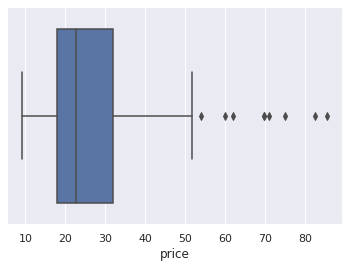

In [ ]:
sns.boxplot(x=df.price)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

type         1.00000
engine_s     1.27500
horsepow    63.75000
wheelbas     9.30000
width        4.72500
length      17.65000
curb_wgt     0.85675
fuel_cap     4.02500
mpg          5.00000
price       14.05000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
len(df)

131

**Drop Irrelevent Columns**

In [ ]:
df.drop(['model','manufact'],axis=1,inplace=True)
df.head()

,type,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,price
0,0,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,21.50
2,0,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,28.40
3,0,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,42.00
4,0,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,23.99
5,0,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,33.95


**Heatmap to find relation between Features**


we can see that prices depend mainly on engine size and HP

,type,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,price
type,1.000000,0.239177,0.032612,0.221675,0.037472,-0.050599,0.434960,0.542801,-0.561529,-0.020676
engine_s,0.239177,1.000000,0.780235,0.608002,0.643561,0.637356,0.801820,0.646784,-0.699813,0.528601
horsepow,0.032612,0.780235,1.000000,0.526897,0.561939,0.528882,0.733183,0.572672,-0.615674,0.827566
wheelbas,0.221675,0.608002,0.526897,1.000000,0.659359,0.802333,0.674301,0.599388,-0.433867,0.335369
width,0.037472,0.643561,0.561939,0.659359,1.000000,0.671299,0.621092,0.447833,-0.403567,0.360608
length,-0.050599,0.637356,0.528882,0.802333,0.671299,1.000000,0.608179,0.487476,-0.306701,0.253034
curb_wgt,0.434960,0.801820,0.733183,0.674301,0.621092,0.608179,1.000000,0.840116,-0.788092,0.630318
fuel_cap,0.542801,0.646784,0.572672,0.599388,0.447833,0.487476,0.840116,1.000000,-0.767556,0.484777
mpg,-0.561529,-0.699813,-0.615674,-0.433867,-0.403567,-0.306701,-0.788092,-0.767556,1.000000,-0.513747
price,-0.020676,0.528601,0.827566,0.335369,0.360608,0.253034,0.630318,0.484777,-0.513747,1.000000


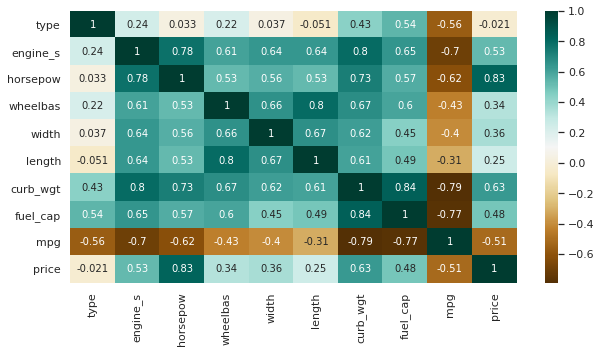

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

**Scaterplot to demonstrait correlation between price and HP**

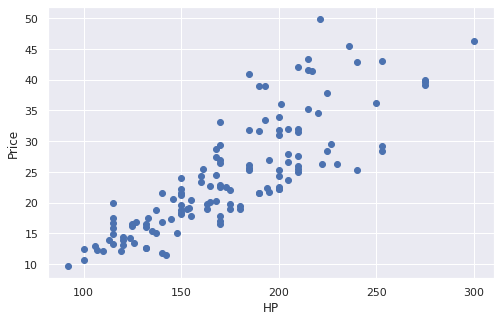

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df.horsepow, df.price)
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

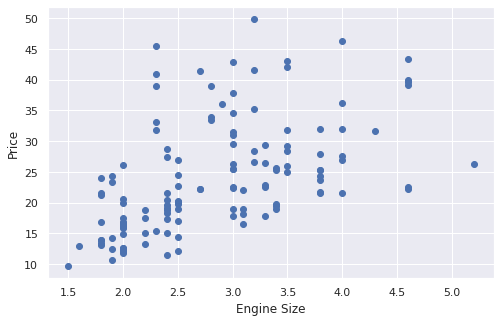

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df.engine_s, df.price)
ax.set_xlabel('Engine Size')
ax.set_ylabel('Price')
plt.show()

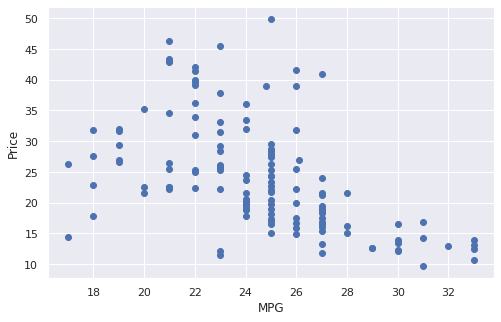

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df.mpg, df.price)
ax.set_xlabel('MPG')
ax.set_ylabel('Price')
plt.show()

**Normalizing Features**




In [ ]:
df.engine_s=pd.DataFrame((df.engine_s-df.engine_s.mean())/df.engine_s.std()).values
df.horsepow=pd.DataFrame((df.horsepow-df.horsepow.mean())/df.horsepow.std()).values
df.wheelbas=pd.DataFrame((df.wheelbas-df.wheelbas.mean())/df.wheelbas.std()).values
df.width=pd.DataFrame((df.width-df.width.mean())/df.width.std()).values
df.length=pd.DataFrame((df.length-df.length.mean())/df.length.std()).values
df.curb_wgt=pd.DataFrame((df.curb_wgt-df.curb_wgt.mean())/df.curb_wgt.std()).values
df.fuel_cap=pd.DataFrame((df.fuel_cap-df.fuel_cap.mean())/df.fuel_cap.std()).values
df.mpg=pd.DataFrame((df.mpg-df.mpg.mean())/df.mpg.std()).values
df.head(10)

,type,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,price
0,0,-1.288337,-0.803575,-0.916791,-1.088298,-1.096822,-1.238410,-1.391732,1.012849,21.500
2,0,0.455434,1.186154,0.291560,-0.075508,0.576006,0.501670,0.053507,0.142034,28.400
3,0,0.829100,0.835025,1.429862,0.295848,0.877931,1.161631,0.342555,-0.728782,42.000
4,0,-1.288337,-0.569490,-0.671618,-0.784461,-0.639855,-0.526919,-0.235541,0.722577,23.990
5,0,-0.042786,0.600939,0.396634,1.882552,0.502565,0.588872,0.523210,-0.728782,33.950
7,0,-0.416451,-0.101318,0.151462,-0.716942,-0.803057,-0.168202,-0.163279,0.461333,26.990
8,0,-0.042786,0.437079,0.151462,-0.683182,-0.803057,-0.132528,-0.163279,-0.148238,33.400
9,0,-0.042786,0.437079,0.869468,0.127050,0.176159,0.412486,0.523210,0.083979,38.900
10,0,0.330879,0.015725,0.449171,0.734724,0.714728,0.206371,0.161900,0.142034,21.975
11,0,1.202765,1.537283,0.449171,0.734724,0.845291,0.553198,0.161900,-0.438510,25.300


**Splitting the dataset into the Training set and Test set**

In [ ]:
X_tr=df.iloc[:100, :-1].values
y_tr=df.iloc[:100, -2:-1].values
X_tst=df.iloc[100:, :-1].values
y_tst=df.iloc[100:, -2:-1].values

**Regression Class**


In [ ]:
class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.rand(num_features, 1)
        self.b = np.random.rand()
        
    def forward_pass(self, X):
        y = self.b + np.dot(X, self.W)
        return y
    
    def compute_loss(self, y, y_true):
        loss = np.sum(np.square(y - y_true))
        return loss/(2*y.shape[0])
    
    def backward_pass(self, X, y_true, y_hat):
        sns.scatterplot
        m = y_hat.shape[0]
        db = np.sum(y_hat - y_true)/m
        dW = np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)/m
        return dW, db
    
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr * db
        
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(iterations):
            y_hat = self.forward_pass(x_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            loss = self.compute_loss(y_hat, y_train)
            losses.append(loss)
            if i % 500 == 0:
                print('Iter: {}, Current loss: {:.4f}'.format(i, loss))
        return losses

**Training Model**

In [ ]:
myModel=LinearModel(9)

Iter: 0, Current loss: 7.7881
Iter: 500, Current loss: 1.8395
Iter: 1000, Current loss: 0.5615
Iter: 1500, Current loss: 0.2548
Iter: 2000, Current loss: 0.1584
Iter: 2500, Current loss: 0.1134
Iter: 3000, Current loss: 0.0853
Iter: 3500, Current loss: 0.0653
Iter: 4000, Current loss: 0.0504
Iter: 4500, Current loss: 0.0393
Iter: 5000, Current loss: 0.0308
Iter: 5500, Current loss: 0.0244
Iter: 6000, Current loss: 0.0195
Iter: 6500, Current loss: 0.0157
Iter: 7000, Current loss: 0.0128
Iter: 7500, Current loss: 0.0106
Iter: 8000, Current loss: 0.0088
Iter: 8500, Current loss: 0.0074
Iter: 9000, Current loss: 0.0063
Iter: 9500, Current loss: 0.0054


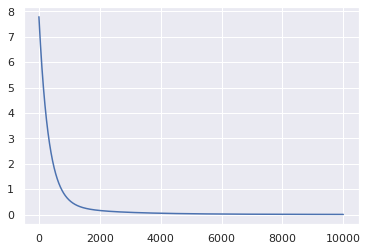

In [ ]:
losses= myModel.train(X_tr,y_tr,10000,0.0003)

**Ploting Costs**

In [ ]:
plt.plot(losses)

**Forward pass on test set**

In [ ]:
y_test_pred=myModel.forward_pass(X_tst)


**Ploting Predictions vs Actual Values for test set**

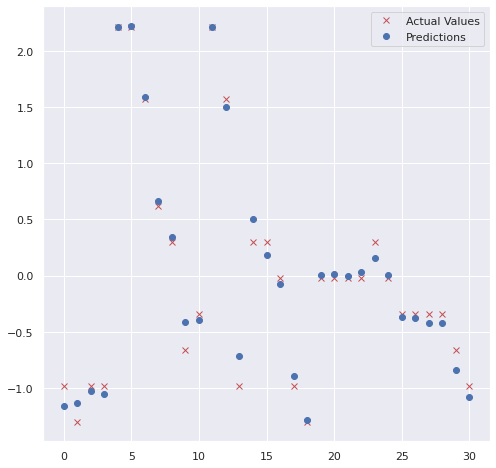

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(y_tst,'rx',label='Actual Values')
plt.plot(y_test_pred,'bo',label='Predictions')
plt.legend()
plt.show()

In [ ]:

def pearsonr(X, Y):
    ''' Takes X & Y as numpy array
       returms Pearson Correlation Coefficient 
    '''
    # Normalise X and Y
    X -= X.mean(0)
    Y -= Y.mean(0)
    # Standardise X and Y
    X /= X.std(0)
    Y /= Y.std(0)
    # Compute mean product
    return np.mean(X*Y)
print("Accuracy of the model",pearsonr(y_tst, y_test_pred))

Accuracy of the model 0.9941748709261294


**Fetching learned weights of the model for future predictions**


In [ ]:
W=myModel.W
b=myModel.b
print("Value of Weights(W) ",W)
print("Value of bias(b) ",b)

Value of Weights(W)  [[ 0.17498029]
 [ 0.08711869]
 [-0.00960086]
 [-0.07116314]
 [ 0.03858008]
 [ 0.03372087]
 [-0.04257171]
 [-0.09552984]
 [ 0.98754257]]
Value of bias(b)  -0.006185565562785028
